<a href="https://colab.research.google.com/github/dscoool/opencv/blob/main/opencv_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크기 조절(Resize)

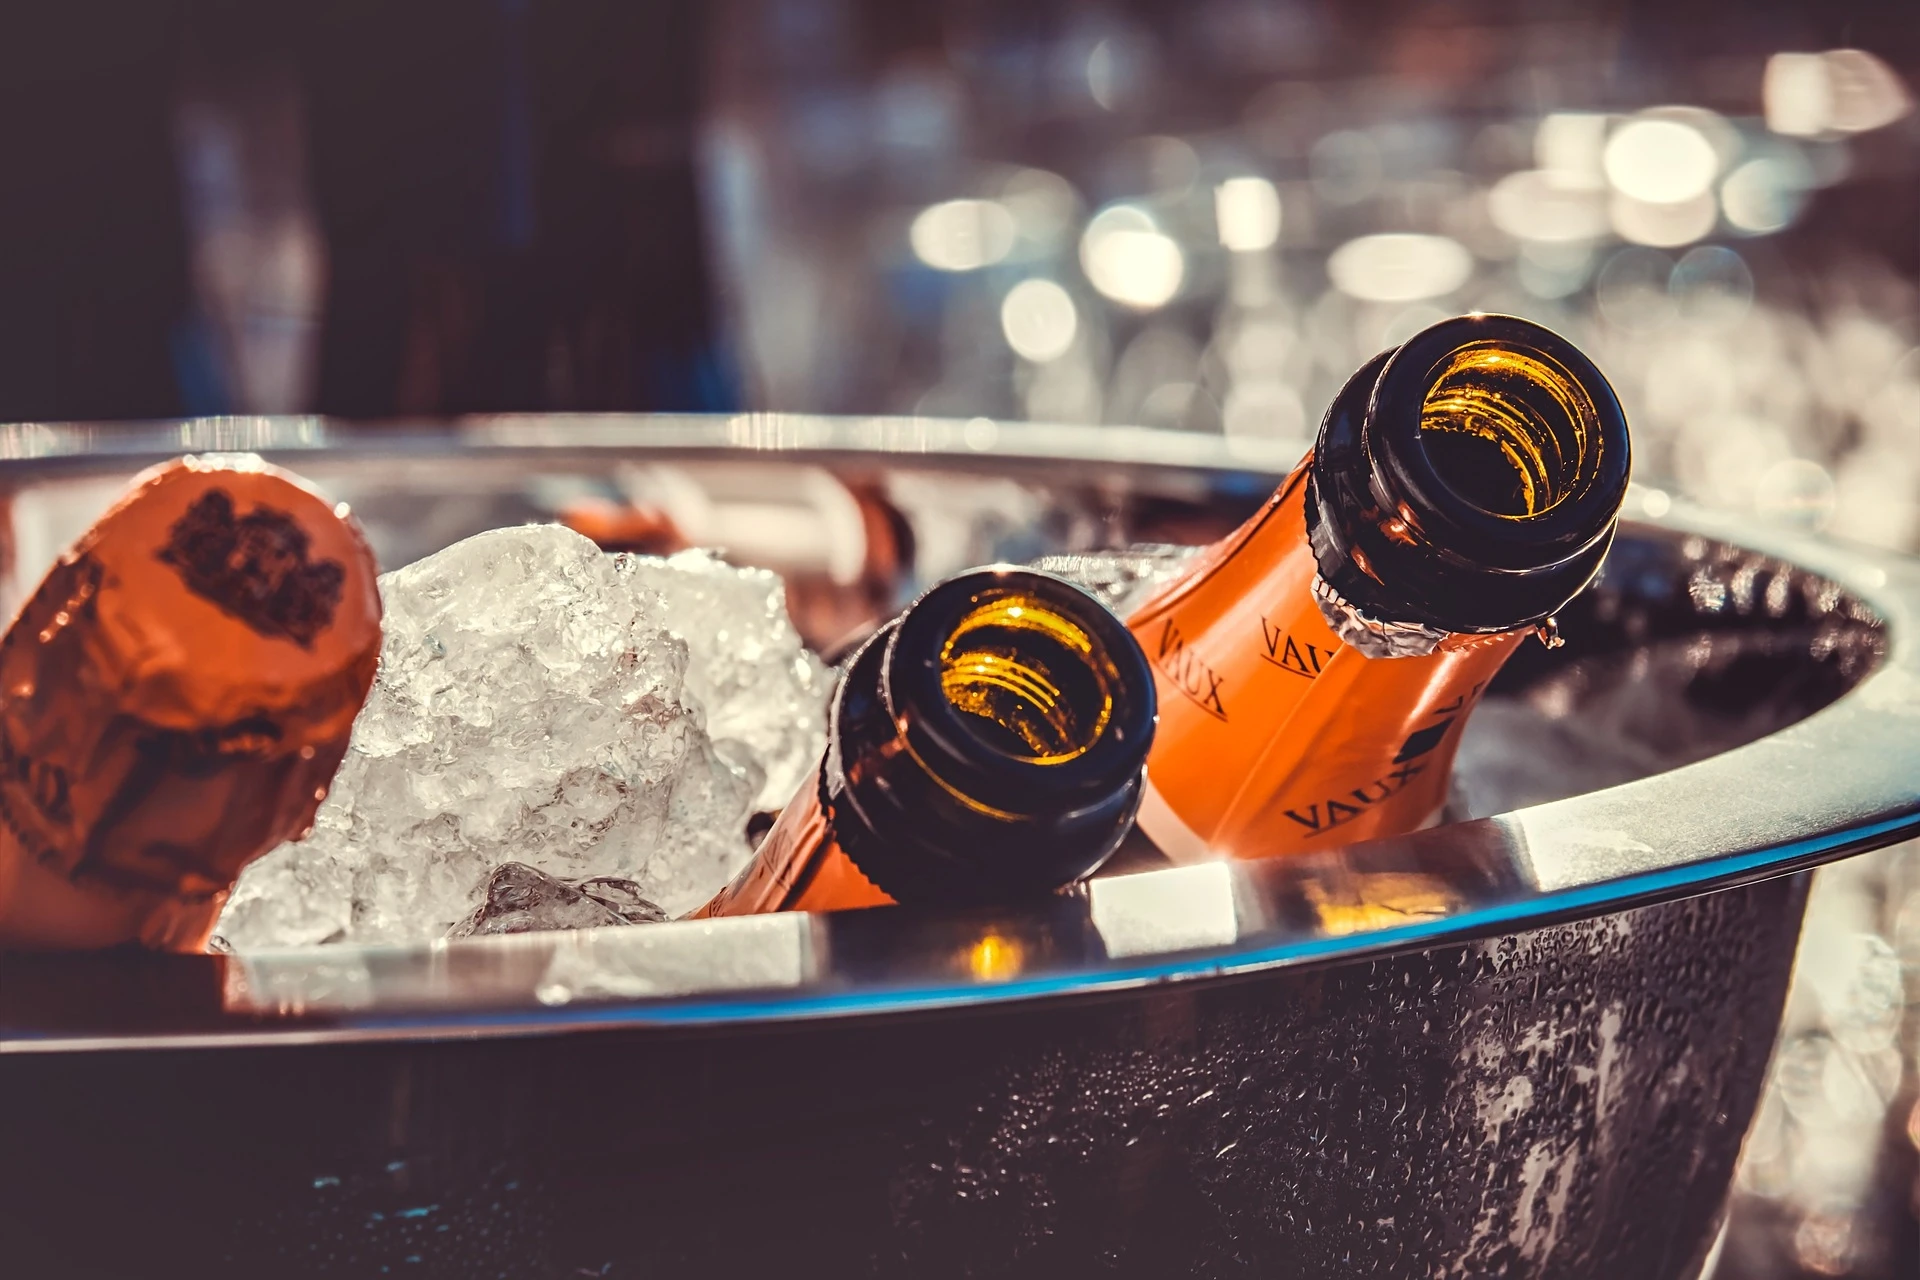

영상이나 이미지의 이미지를 확대하거나 축소하는 연산에서 확인할 수 있듯이 이미지의 크기를 변형하는 것은 단순한 연산이 아닙니다.

이미지를 확대하는 경우에는 픽셀에 대한 보간법, 이미지를 축소하는 경우에는 픽셀에 대한 병합법이 수행됩니다.

이미지 피라미드는 2배로 확대하거나 축소하는 경우만 가능하므로, 원하는 크기로 변환하기 위해서 이미지 크기 조절 함수를 사용합니다.

이미지 크기를 조절하는 방법은 크게 두 가지 방법이 있습니다.

첫 번째 방법은 이미지의 크기를 사용자가 요구하는 절대 크기로 변경하는 방법입니다. 즉, 임의의 크기(640×480이나 123×456 등의 이미지 크기)로 변환하는 것을 의미합니다.

두 번째 방법은 이미지의 크기를 비율에 맞게 상대 크기로 변경하는 방법입니다. 이 경우, 입력 이미지의 크기와 비례하도록 너비와 높이가 계산됩니다.

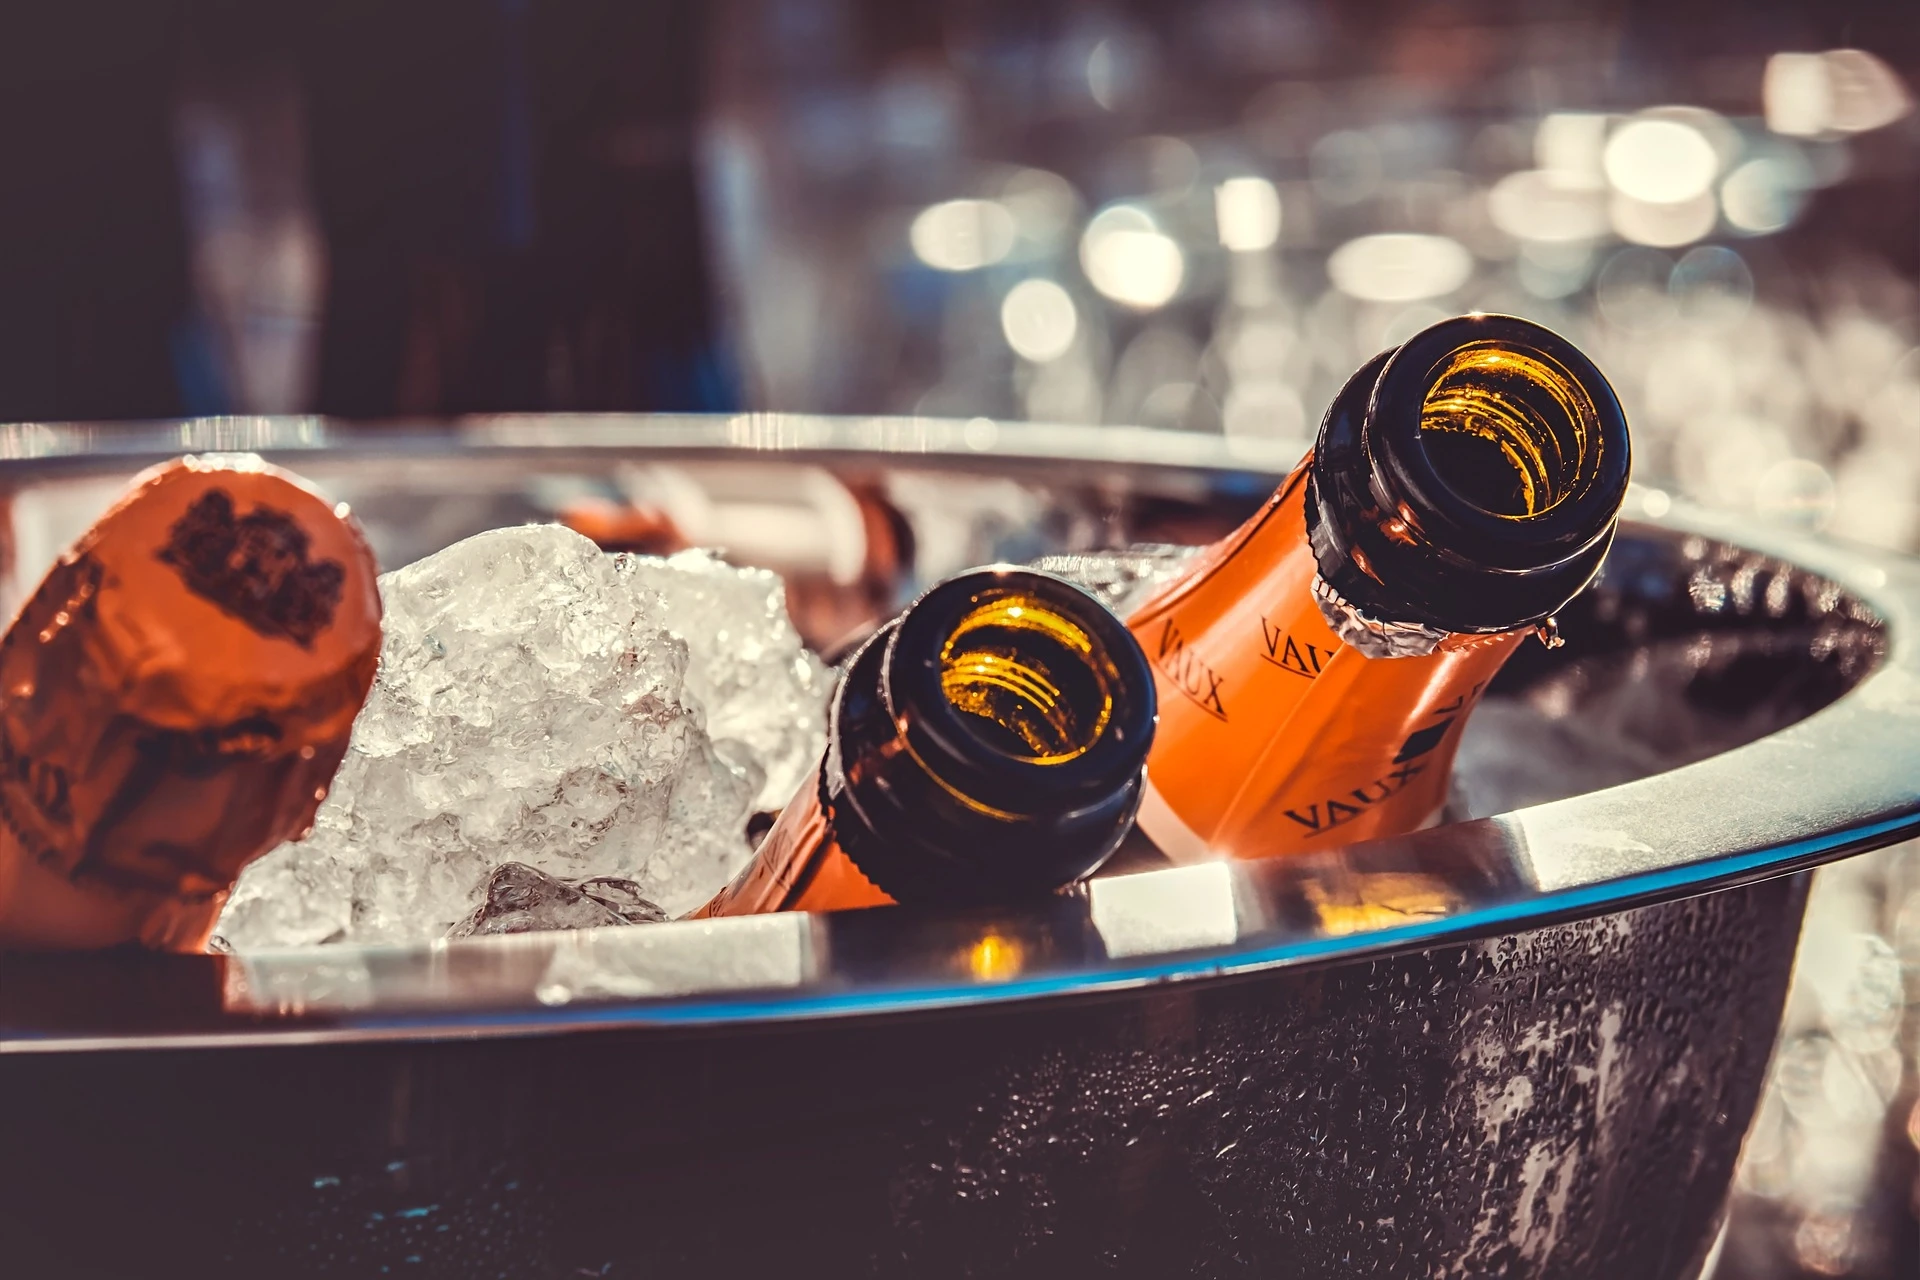

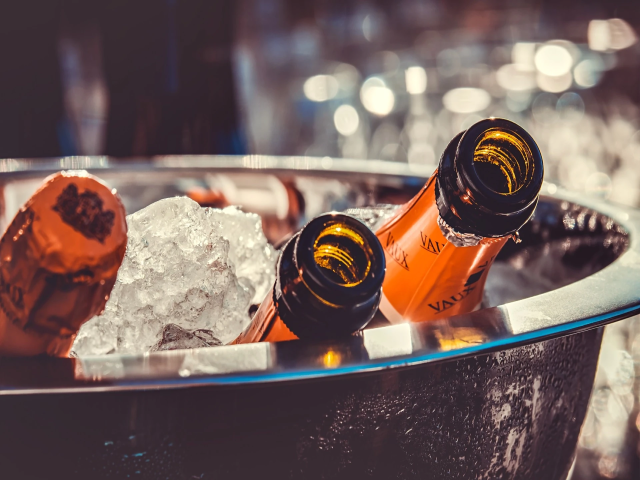

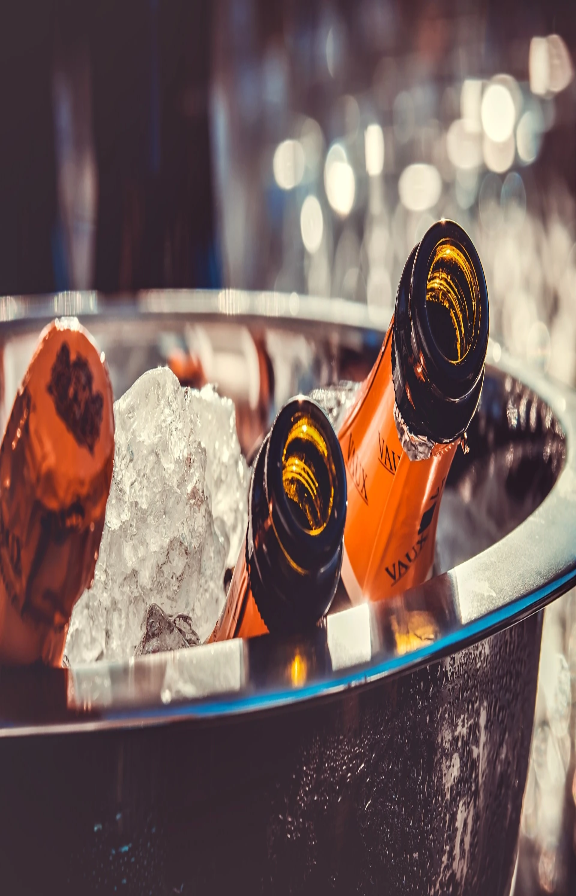

In [1]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

img_url="https://raw.githubusercontent.com/dscoool/opencv/refs/heads/main/beer.webp"

# Download the image from the URL
response = requests.get(img_url, stream=True).raw
image = np.asarray(bytearray(response.read()), dtype="uint8")

# Decode the image using OpenCV
src = cv2.imdecode(image, cv2.IMREAD_COLOR)
# src = cv2.imread("Image/champagne.jpg", cv2.IMREAD_COLOR)

dst = cv2.resize(src, dsize=(640, 480), interpolation=cv2.INTER_AREA)
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR)

cv2_imshow(src)
cv2_imshow(dst)
cv2_imshow(dst2)
cv2.waitKey()
cv2.destroyAllWindows()

세부 코드



```
dst = cv2.resize(src, dsize=(640, 480), interpolation=cv2.INTER_AREA)
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR)
```

이미지 크기 조절 함수(cv2.resize)로 이미지의 크기를 변경할 수 있습니다.

dst = cv2.resize(src, dstSize, fx, fy, interpolation)는 입력 이미지(src), 절대 크기(dstSize), 상대 크기(fx, fy), 보간법(interpolation)으로 출력 이미지(dst)을 생성합니다.

절대 크기는 튜플(Tuple) 형식으로 (너비, 높이)의 값을 할당해 사용합니다.

절대 크기는 다음과 같은 수식을 통해 계산됩니다.





상대 크기는 절대 크기에 (0, 0)을 할당한 다음, 상대 크기의 값을 할당해 사용합니다.


절대 크기에 (0, 0)을 할당하는 이유로는 fx와 fy에서 계산된 크기가 dsize에 할당되기 때문입니다.

그러므로, 상대 크기로 이미지를 변경하기 위해서는 절대 크기에 0의 값을 할당해 사용합니다.

상대 크기는 다음과 같은 수식을 통해 계산됩니다.





보간법은 이미지의 크기를 변경하는 경우, 변형된 이미지의 픽셀은 추정해서 값을 할당해야 합니다.

이미지의 비율을 변경하면 존재하지 않는 영역에 새로운 픽셀값을 매핑하거나 존재하는 픽셀들을 압축해서 새로운 값을 할당해야 합니다.


이를 이미지 상에 존재하는 픽셀 데이터
들에 대해 근사 함수
를 적용해서 새로운 픽셀 값을 구하는 것으로 이해할 수 있습니다.

그러므로, 추정해야 하는 픽셀은 보간법을 이용하여 픽셀들의 값을 할당합니다.


interpolation 속성

속성	의미

```
cv2.INTER_NEAREST	이웃 보간법
cv2.INTER_LINEAR	쌍 선형 보간법
cv2.INTER_LINEAR_EXACT	비트 쌍 선형 보간법
cv2.INTER_CUBIC	바이큐빅 보간법
cv2.INTER_AREA	영역 보간법
cv2.INTER_LANCZOS4	Lanczos 보간법
```

일반적으로 쌍 선형 보간법이 가장 많이 사용됩니다.


이미지를 확대하는 경우, 바이큐빅 보간법이나 쌍 선형 보간법을 가장 많이 사용합니다.

이미지를 축소하는 경우, 영역 보간법을 가장 많이 사용합니다.

영역 보간법에서 이미지를 확대하는 경우, 이웃 보간법과 비슷한 결과를 반환합니다.